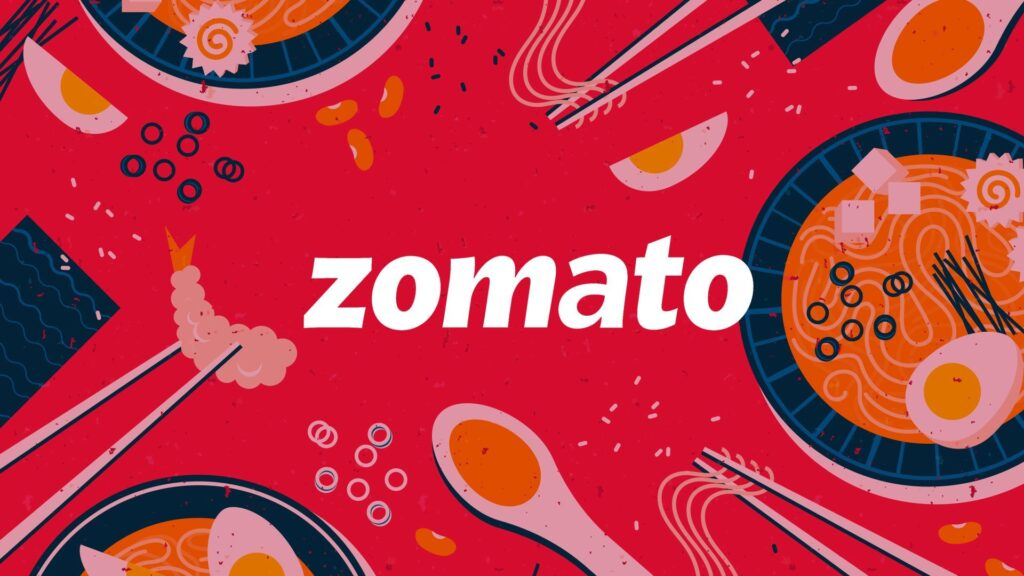

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [3]:
df1=pd.read_csv(r"D:\L Python\zomato.csv\zomato.csv")
df1.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [4]:
df1=df1.drop(['url','address','phone','menu_item','reviews_list','dish_liked'],axis=1)


In [5]:
#Drop Duplicates
df1.drop_duplicates(inplace=True)



In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51609 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         51609 non-null  object
 1   online_order                 51609 non-null  object
 2   book_table                   51609 non-null  object
 3   rate                         43854 non-null  object
 4   votes                        51609 non-null  int64 
 5   location                     51588 non-null  object
 6   rest_type                    51382 non-null  object
 7   cuisines                     51564 non-null  object
 8   approx_cost(for two people)  51265 non-null  object
 9   listed_in(type)              51609 non-null  object
 10  listed_in(city)              51609 non-null  object
dtypes: int64(1), object(10)
memory usage: 4.7+ MB


In [7]:
df1.shape
df1.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'cuisines', 'approx_cost(for two people)',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [8]:
#clean rate column
df1['rate'].unique()


array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [9]:
#Removing "New",'-'and "/5" from rate column
def rate(value):
    if (value=='NEW'or value=='-'):
        return np.nan
    else:
        value=str(value).split('/')
        value=value[0]
        return float(value)


df1['rate']=df1['rate'].apply(rate)
df1['rate'].head()




0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

In [10]:
df1['rate'].isnull().sum()

10019

In [11]:
#fill all null values to mean of rate values
df1['rate'].fillna(df1['rate'].mean,inplace=True)

df1.rate.isnull().sum()


C:\Users\yash1\AppData\Local\Temp\ipykernel_16068\4155529368.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '<bound method Series.mean of 0        4.1
1        4.1
2        3.8
3        3.7
4        3.8
        ... 
51712    3.6
51713    NaN
51714    NaN
51715    4.3
51716    3.4
Name: rate, Length: 51609, dtype: float64>' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df1['rate'].fillna(df1['rate'].mean,inplace=True)


0

In [12]:
#drop null values (because rest of columns not have less null values )
df1.dropna(inplace=True)

In [13]:
#change columns names
df1=df1.rename(columns={'approx_cost(for two people)':'costof2plates','listed_in(type)':'Type'})
df1.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,costof2plates,Type,listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [14]:
#location and listed_in_city both are location ,lets keep one location column
df1=df1.drop(['listed_in(city)'],axis=1)

df1.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,costof2plates,Type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet


In [15]:
def  fix_comma (values):
    values=str(values)
    values=values.replace(',','')
    return float(values) 


df1['costof2plates']=df1['costof2plates'].apply(fix_comma)
df1['costof2plates'].unique()
    

array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        900.,  200.,  750.,  150.,  850.,  100., 1200.,  350.,  250.,
        950., 1000., 1500., 1300.,  199.,   80., 1100.,  160., 1600.,
        230.,  130.,   50.,  190., 1700., 1400.,  180., 1350., 2200.,
       2000., 1800., 1900.,  330., 2500., 2100., 3000., 2800., 3400.,
         40., 1250., 3500., 4000., 2400., 2600.,  120., 1450.,  469.,
         70., 3200.,   60.,  560.,  240.,  360., 6000., 1050., 2300.,
       4100., 5000., 3700., 1650., 2700., 4500.,  140.])

In [16]:
rest_type=df1['rest_type'].value_counts(ascending=False)
rest_type

rest_type
Quick Bites                   19010
Casual Dining                 10253
Cafe                           3682
Delivery                       2574
Dessert Parlor                 2242
                              ...  
Dessert Parlor, Kiosk             2
Food Court, Beverage Shop         2
Dessert Parlor, Food Court        2
Quick Bites, Kiosk                1
Sweet Shop, Dessert Parlor        1
Name: count, Length: 93, dtype: int64

In [17]:
rest_typeless_1000=rest_type[rest_type<1000]
rest_typeless_1000

rest_type
Beverage Shop                 863
Bar                           686
Food Court                    616
Sweet Shop                    468
Bar, Casual Dining            411
                             ... 
Dessert Parlor, Kiosk           2
Food Court, Beverage Shop       2
Dessert Parlor, Food Court      2
Quick Bites, Kiosk              1
Sweet Shop, Dessert Parlor      1
Name: count, Length: 85, dtype: int64

In [18]:
#MAking res_typesless than 1000 as others

def handle_rest_type (value):
    if value in rest_typeless_1000:
      return 'others'
    else:
      return value

df1['rest_type']= df1['rest_type'].apply( handle_rest_type )
df1['rest_type'].value_counts()


rest_type
Quick Bites           19010
Casual Dining         10253
others                 9003
Cafe                   3682
Delivery               2574
Dessert Parlor         2242
Takeaway, Delivery     2008
Bakery                 1140
Casual Dining, Bar     1130
Name: count, dtype: int64

In [19]:
#MAking location_less_than1000 as others

location=df1['location'].value_counts(ascending=False)
loc_less_than300=location[location<300]

def handle_location (value):
    if value in loc_less_than300:
        return 'others'
    else:
        return value

df1['location']=df1['location'].apply(handle_location)
df1["location"].value_counts()
  

location
BTM                      5056
others                   4954
HSR                      2494
Koramangala 5th Block    2479
JP Nagar                 2218
Whitefield               2105
Indiranagar              2026
Jayanagar                1916
Marathahalli             1805
Bannerghatta Road        1609
Bellandur                1268
Electronic City          1246
Koramangala 1st Block    1236
Brigade Road             1210
Koramangala 7th Block    1174
Koramangala 6th Block    1127
Sarjapur Road            1047
Koramangala 4th Block    1017
Ulsoor                   1011
Banashankari              902
MG Road                   893
Kalyan Nagar              841
Richmond Road             803
Malleshwaram              721
Frazer Town               714
Basavanagudi              684
Residency Road            671
Brookefield               656
New BEL Road              644
Banaswadi                 640
Kammanahalli              639
Rajajinagar               591
Church Street             566
L

In [75]:
cuisines=df1['cuisines'].value_counts(ascending=False)
cuisines_lessthan_200=cuisines[cuisines<200]
cuisines_lessthan_200

def handle_cuisines (value):
    if value in cuisines_lessthan_200:
        return 'other'
    else:
       return value

df1['cuisines']=df1['cuisines'].apply(handle_cuisines)
df1['cuisines'].value_counts()


cuisines
other                                  30795
North Indian                            2852
North Indian, Chinese                   2351
South Indian                            1820
Biryani                                  903
Bakery, Desserts                         898
Fast Food                                796
Desserts                                 754
Cafe                                     725
South Indian, North Indian, Chinese      724
Bakery                                   649
Chinese                                  552
Ice Cream, Desserts                      415
Chinese, North Indian                    405
Mithai, Street Food                      363
Desserts, Ice Cream                      349
North Indian, Chinese, Biryani           345
South Indian, North Indian               337
North Indian, South Indian               329
North Indian, South Indian, Chinese      305
Beverages                                284
North Indian, Biryani                    283
B

In [21]:
df1['Type'].value_counts()

Type
Delivery              25579
Dine-out              17562
Desserts               3559
Cafes                  1703
Drinks & nightlife     1084
Buffet                  869
Pubs and bars           686
Name: count, dtype: int64

(array([   0., 1000., 2000., 3000., 4000., 5000., 6000.]),
 [Text(0.0, 0, '0'),
  Text(1000.0, 0, '1000'),
  Text(2000.0, 0, '2000'),
  Text(3000.0, 0, '3000'),
  Text(4000.0, 0, '4000'),
  Text(5000.0, 0, '5000'),
  Text(6000.0, 0, '6000')])

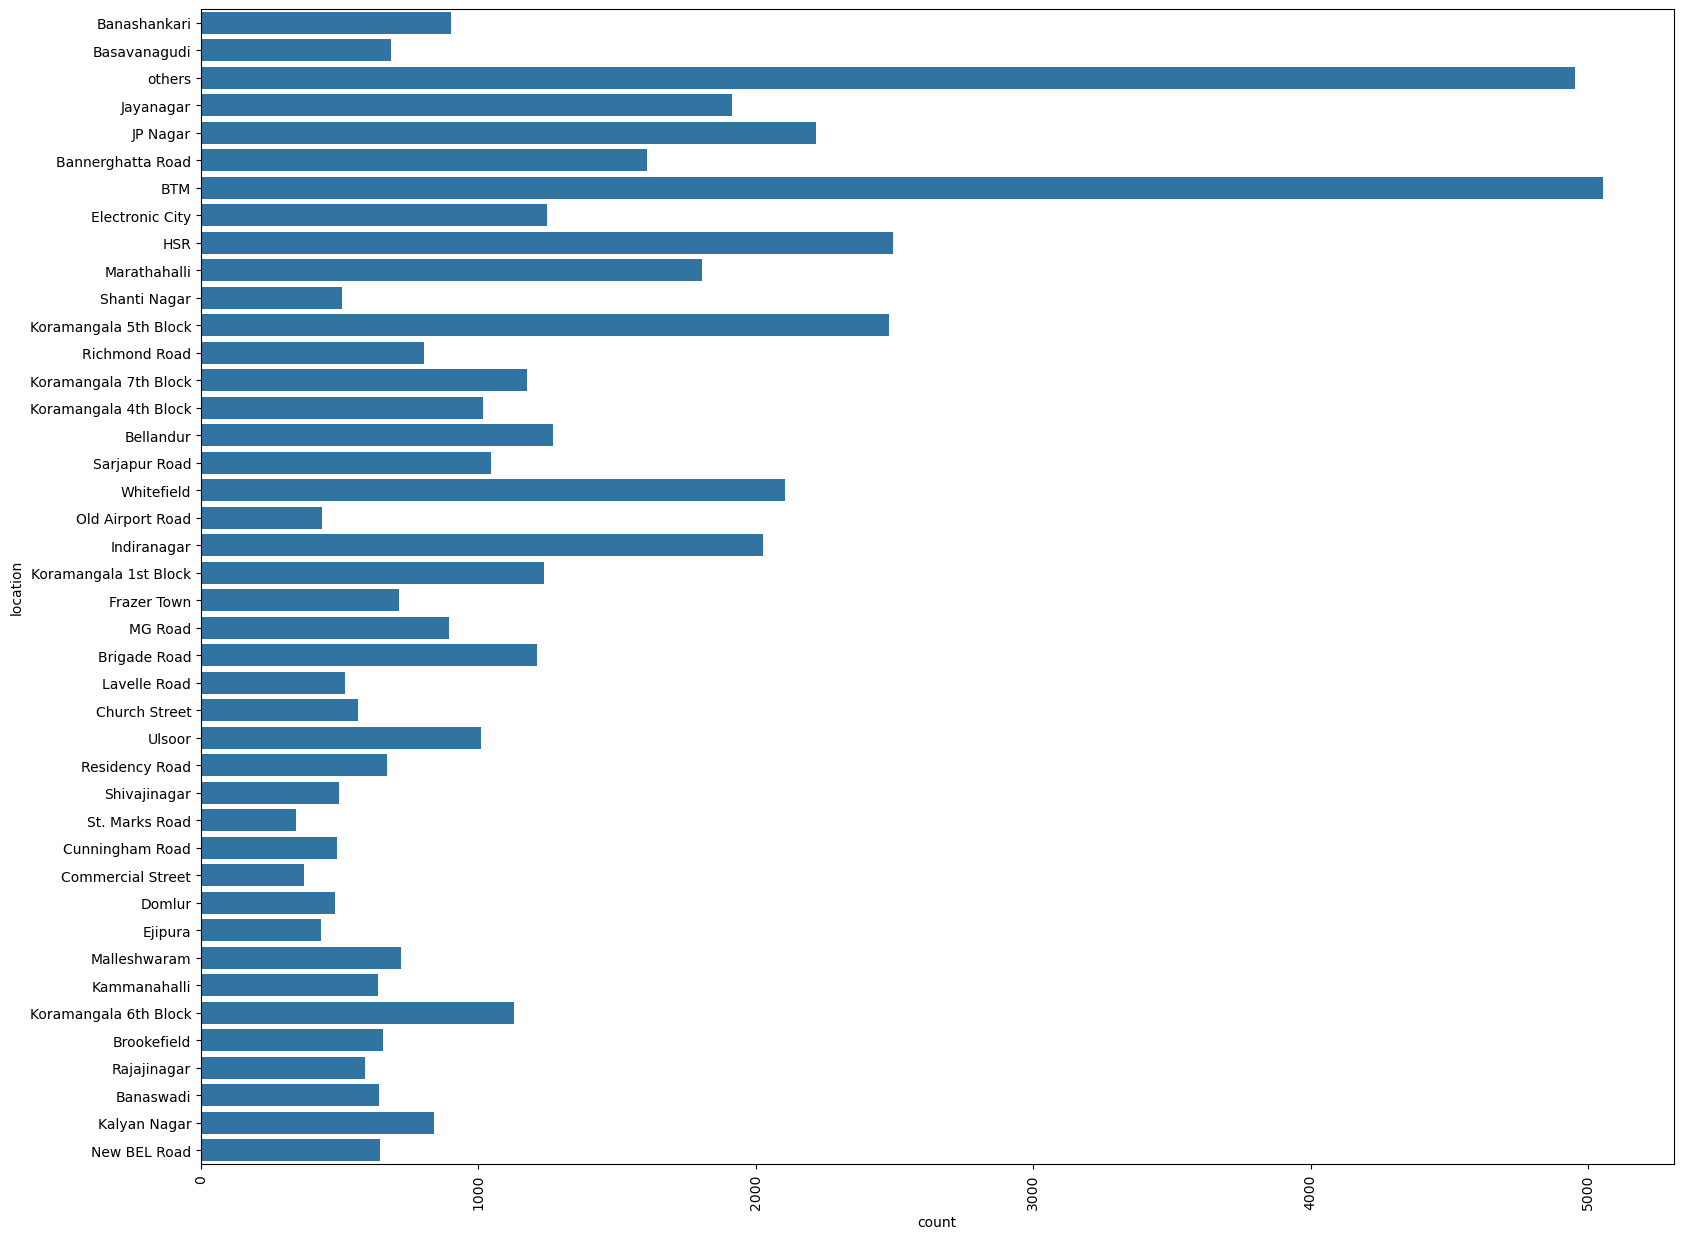

In [22]:
#vsiualizatio part

import matplotlib.pyplot as plt
plt.figure(figsize=(19,15))
sns.countplot(df1['location'])

plt.xticks(rotation=90)

<Axes: xlabel='count', ylabel='online_order'>

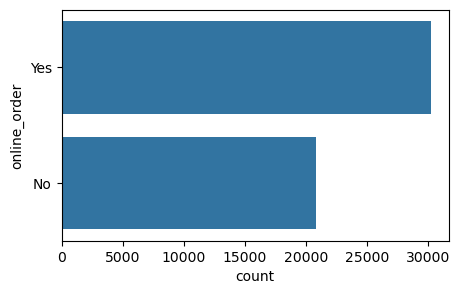

In [23]:
#online order facilities

plt.figure(figsize=(5,3))
sns.countplot(df1['online_order'])

<Axes: xlabel='count', ylabel='book_table'>

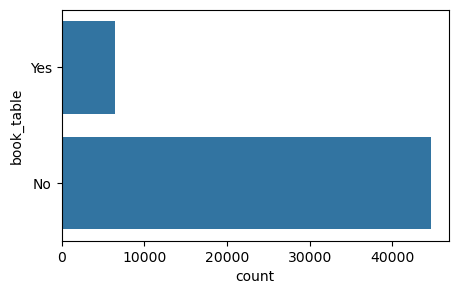

In [24]:
#Book Table

plt.figure(figsize=(5,3))
sns.countplot(df1['book_table'])

Text(0.5, 1.0, 'count of online orders')

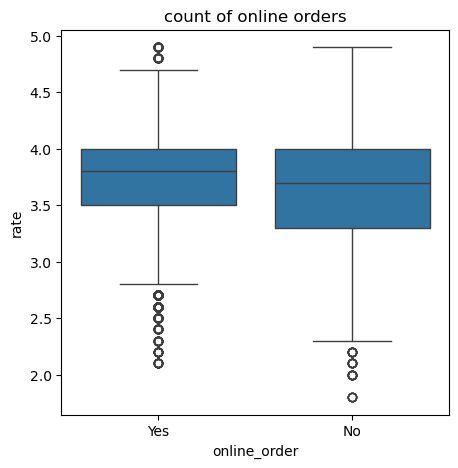

In [25]:
#visualize oonile_order vs rate

df1['rate']=pd.to_numeric(df1['rate'],errors='coerce')     #first convert data type object to numeric to boxplot
plt.figure(figsize=(5,5))
sns.boxplot(x='online_order',y='rate',data=df1)
plt.title('count of online orders')



Text(0.5, 1.0, 'book_table vs rate')

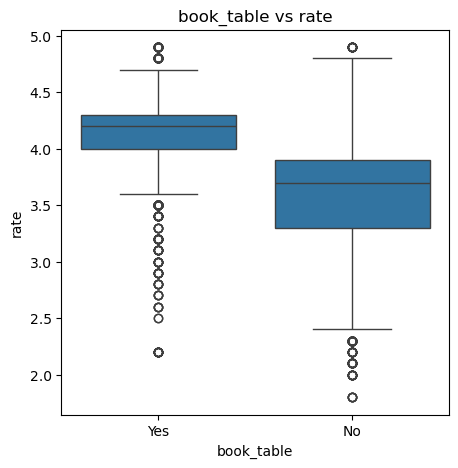

In [26]:
#visualize book_table vs rate
plt.figure(figsize=(5,5))
sns.boxplot(x='book_table',y='rate',data=df1)
plt.title('book_table vs rate')

In [27]:
#create Pivot table & visualization
grp=df1.groupby(['location','online_order'])

grp=pd.pivot_table(df1,values='name',index=['location'],columns=['online_order'],aggfunc='count')
grp

online_order,No,Yes
location,,
BTM,1763,3293
Banashankari,397,505
Banaswadi,302,338
Bannerghatta Road,685,924
Basavanagudi,243,441
Bellandur,517,751
Brigade Road,552,658
Brookefield,239,417
Church Street,226,340


<Axes: xlabel='location'>

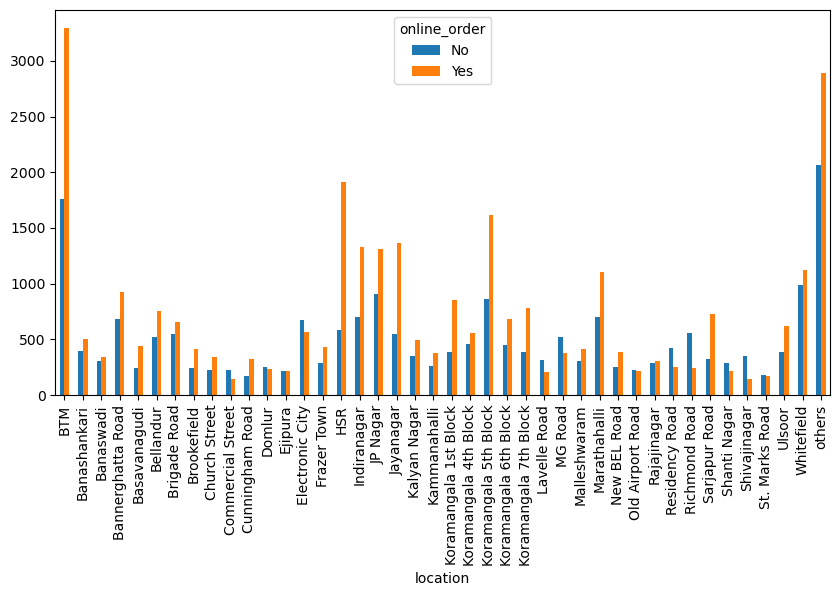

In [28]:
grp.plot(kind='bar',figsize=(10,5))

<Axes: xlabel='location'>

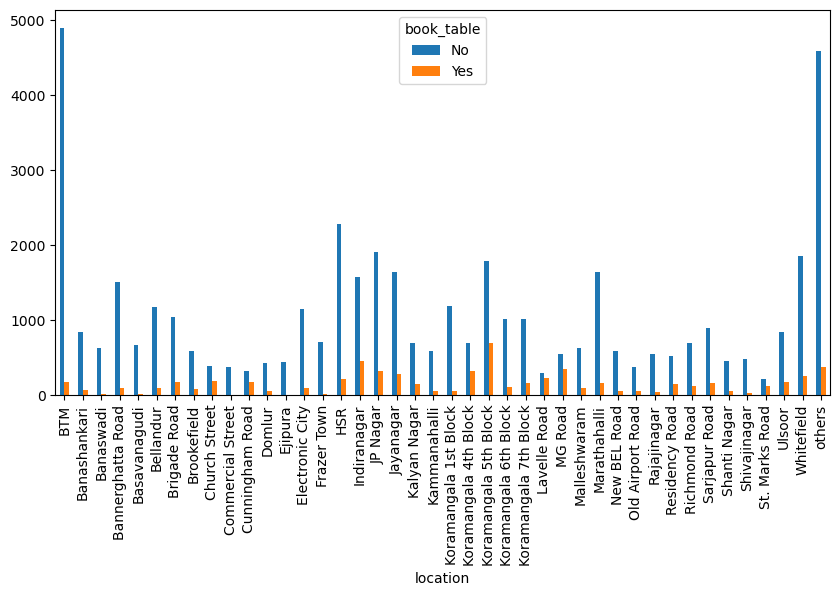

In [29]:
#Visualizing book_table facilities location wise

grp2=pd.pivot_table(df1,values='name',index=['location'],columns=['book_table'],aggfunc='count')
grp2
grp2.plot(kind='bar',figsize=(10,5))

C:\Users\yash1\AppData\Local\Temp\ipykernel_16068\2674636612.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Type',y='rate',data=df1,palette='inferno')


([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Buffet'),
  Text(1, 0, 'Cafes'),
  Text(2, 0, 'Delivery'),
  Text(3, 0, 'Desserts'),
  Text(4, 0, 'Dine-out'),
  Text(5, 0, 'Drinks & nightlife'),
  Text(6, 0, 'Pubs and bars')])

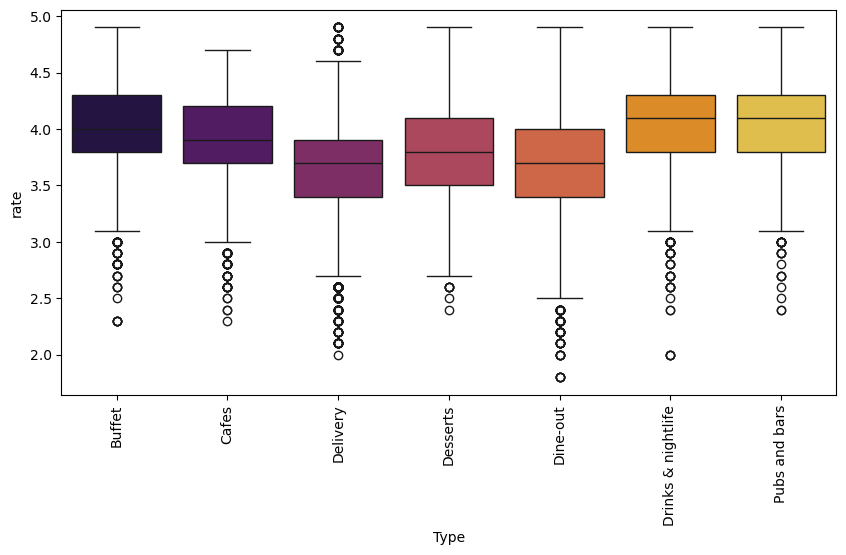

In [30]:
#vualize types of restuarant vs rating
plt.figure(figsize=(10,5))
sns.boxplot(x='Type',y='rate',data=df1,palette='inferno')

plt.xticks(rotation=90)

<Axes: xlabel='location'>

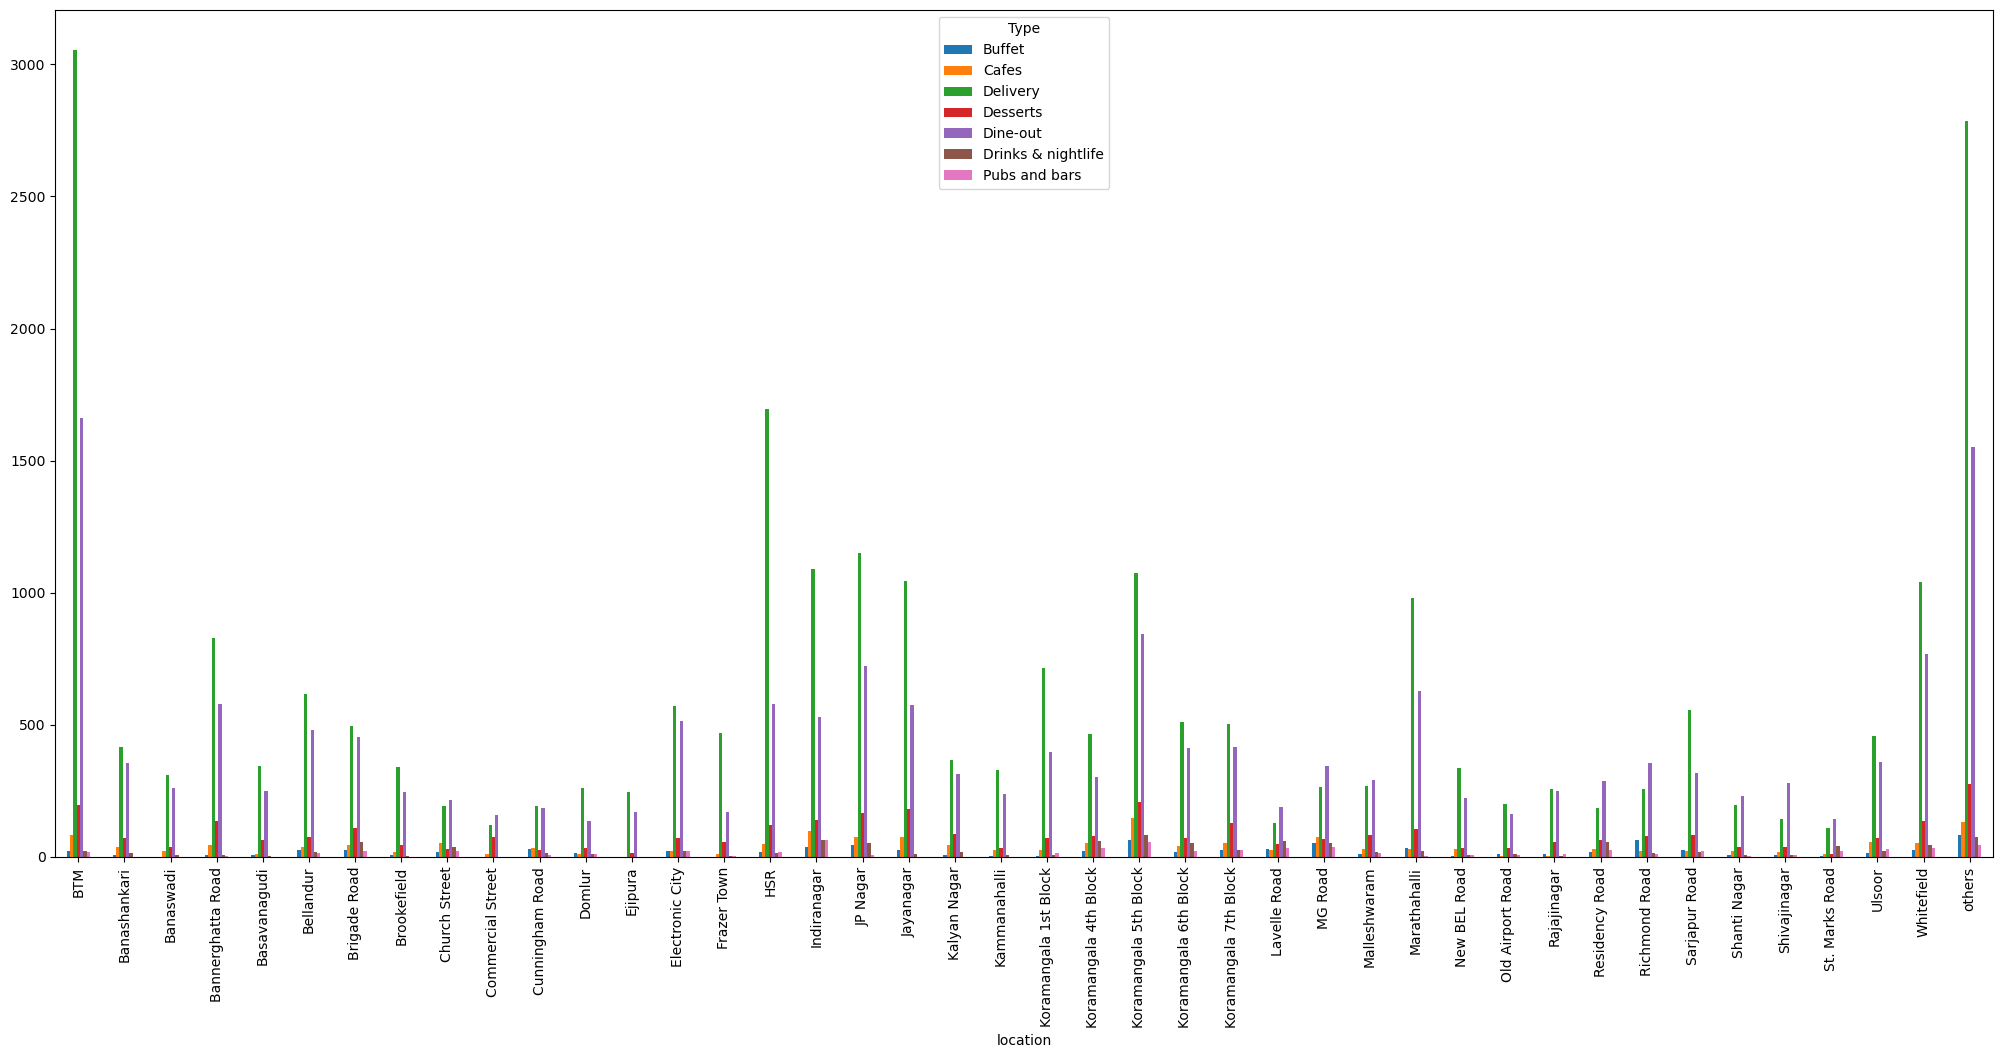

In [31]:
#Grouping types of restuarant ,location wise & Visualize

grp3=pd.pivot_table(df1,values='name',index=['location'],columns=['Type'],aggfunc='count')
grp3

grp3.plot(kind='bar',figsize=(25,11))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41]),
 [Text(0, 0, 'Koramangala 5th Block'),
  Text(1, 0, 'Indiranagar'),
  Text(2, 0, 'Koramangala 4th Block'),
  Text(3, 0, 'Church Street'),
  Text(4, 0, 'JP Nagar'),
  Text(5, 0, 'BTM'),
  Text(6, 0, 'others'),
  Text(7, 0, 'HSR'),
  Text(8, 0, 'Lavelle Road'),
  Text(9, 0, 'Koramangala 7th Block'),
  Text(10, 0, 'Jayanagar'),
  Text(11, 0, 'Whitefield'),
  Text(12, 0, 'Koramangala 6th Block'),
  Text(13, 0, 'Marathahalli'),
  Text(14, 0, 'MG Road'),
  Text(15, 0, 'Brigade Road'),
  Text(16, 0, 'Sarjapur Road'),
  Text(17, 0, 'Residency Road'),
  Text(18, 0, 'Cunningham Road'),
  Text(19, 0, 'St. Marks Road'),
  Text(20, 0, 'Koramangala 1st Block'),
  Text(21, 0, 'Malleshwaram'),
  Text(22, 0, 'Bannerghatta Road'),
  Text(23, 0, 'Bellandur'),
  Text(24, 0, 'Ulsoor'),
  Text(25, 0, 'New BEL Road'),

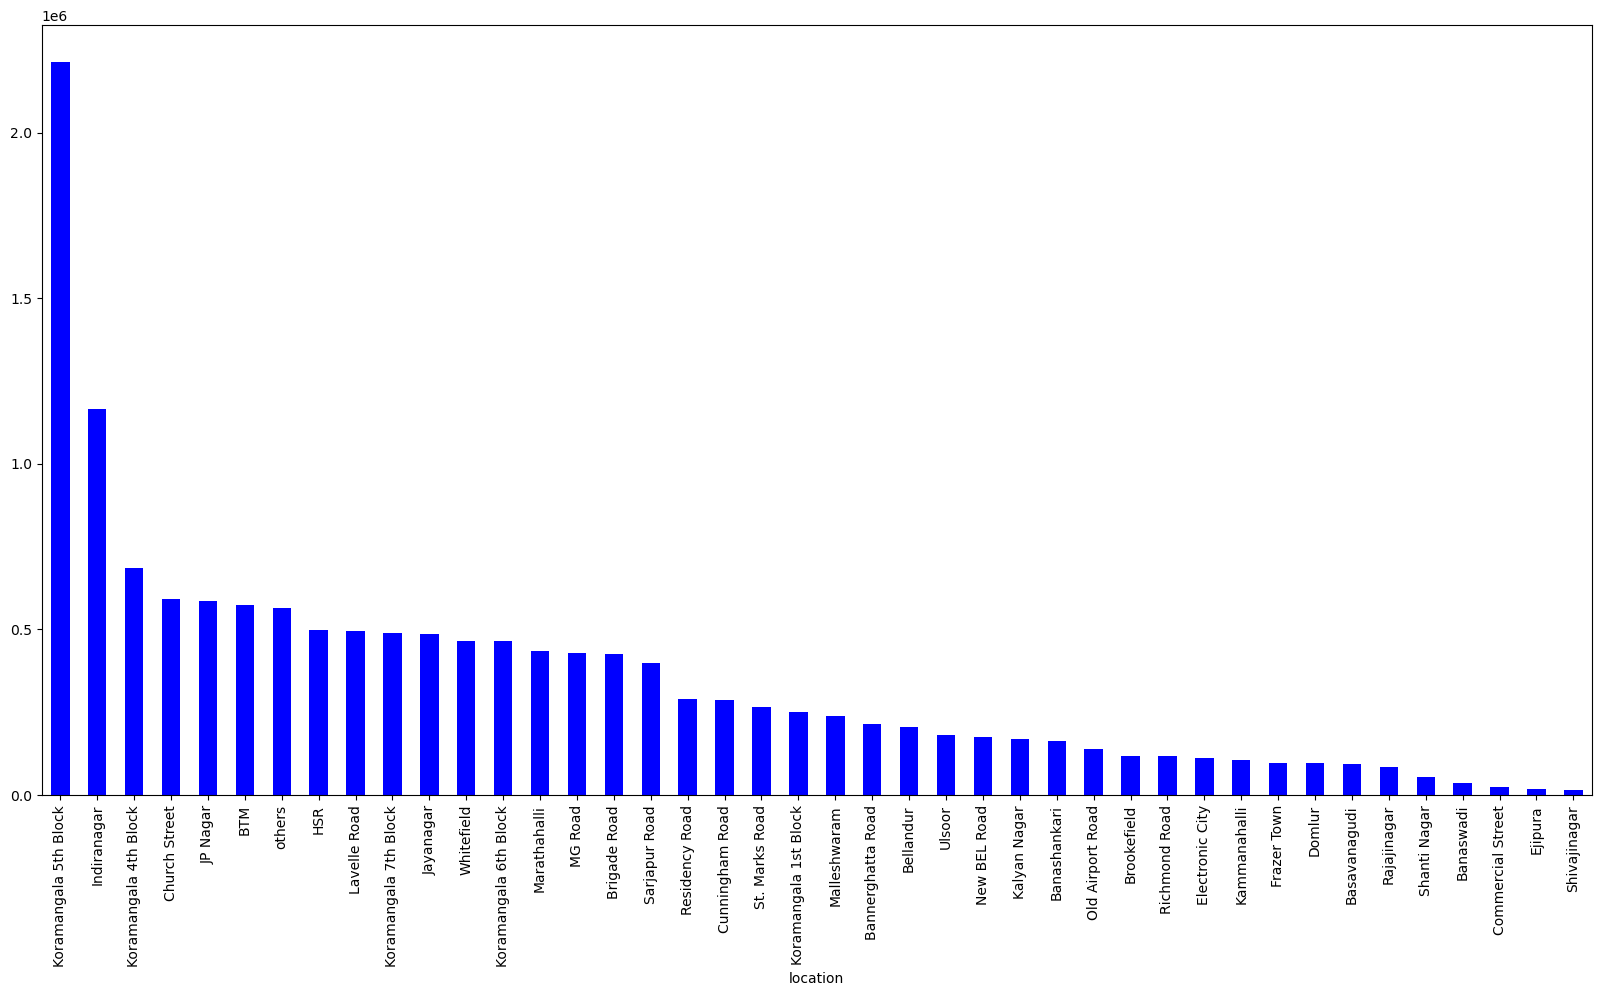

In [32]:
 # vote location wise
grp4=df1.groupby('location')['votes'].sum()
grp4.sort_values(ascending=False,inplace=True)
grp4

#visalization (part)
grp4.plot(kind='bar',figsize=(20,10),color='blue')
plt.xticks(rotation=90)

<Axes: xlabel='cuisines'>

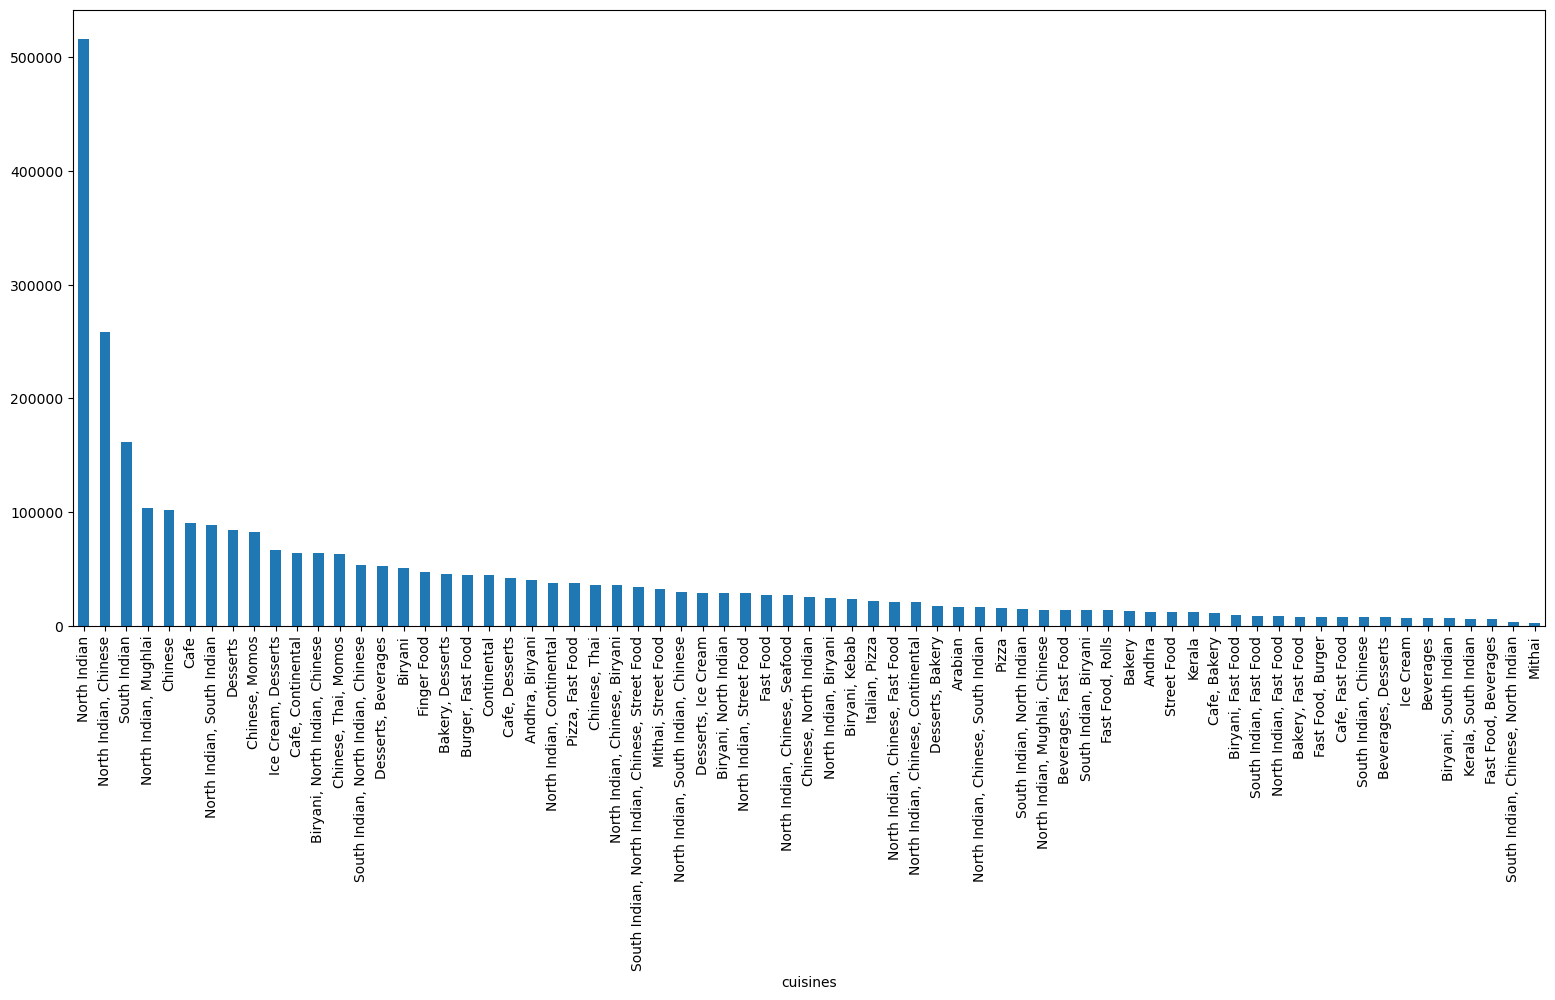

In [33]:
#cuisines vs vote
grp5=df1.groupby(['cuisines'])['votes'].sum()
grp5.sort_values(ascending=False,inplace=True)
grp5=grp5.iloc[1:]
grp5.head()

grp5.plot(kind='bar',figsize=(19,8))


